In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [78]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
8,1310,3,50.0
14,2250,3,101.0
10,1800,3,82.0
19,800,1,32.0
11,2785,4,140.0


In [79]:
df.drop('price', axis='columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

In [ ]:
df['price'].values.reshape(df.shape[0], 1)     
# df['price'] gives index + prices, .values give only values in an array 1-D(Numpy array)
# reshape(df.shape[0], 1) converts 1-D into 2-D array with one column; each array having the price value

In [ ]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

In [ ]:
scaled_X.T

In [84]:
w = np.ones(shape=(2))

In [ ]:
np.dot(w, scaled_X.T) # matrix multiplication w1*area + w2*bedroom -> 1-rowed array

In [86]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features)) # weight array
    b = 0
    total_samples = X.shape[0]

    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b     # adding bias in each y_predicted

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)   # in mean squared error, 2 on diff will come

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted))  # square of each error and then take the mean - MSE
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list 

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

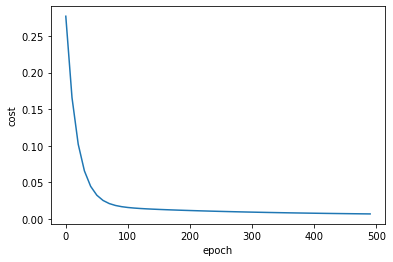

In [87]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [88]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [89]:
arr = np.array([[1, 
                2]]).dot(2)
arr

array([[2, 4]])

In [93]:
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]       # no. of columns = features
    w = np.ones(shape=(number_of_features)) # weight array
    b = 0
    total_samples = X.shape[0]           # no. of rows = data points

    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]         # picks random data point [area, bedroom]
        sample_y = y_true[random_index]     # picks the price at that index
        y_predicted = np.dot(w, sample_x.T) + b     # w1*area + w2*bedroom + b --> a single value

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))   # derivative
        b_grad = -(2/total_samples)*(sample_y-y_predicted)                   

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted) # square of single error
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list 

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.70639478, 0.67516522]), -0.2292608344420849, 0.004869802917179907)

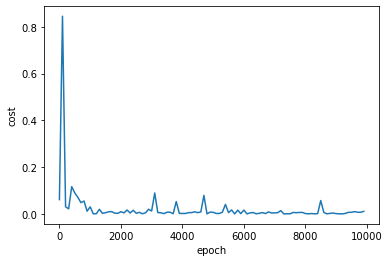

In [94]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)